In [2]:
from numpy import *
from matplotlib.pyplot import *

In [15]:
def findfit(m,xs,ys):
    A=zeros([m+1,m+1])
    b=zeros(m+1)
    for k in range(m+1):
        b[k]=sum(ys*xs**k)
        for j in range(m+1):
            A[k,j]=sum(xs**(k+j))
    a=linalg.solve(A,b)
    def fit(x):
        res=0
        for i in range(m+1):
            res= res + a[i]*x**i
            i=i+1
        return res
    return fit
xi=array([1939,1988,2011,2015])-2015
yi=array([456,219,288,309])
ft=findfit(1,xi,yi) #linear
ft2=findfit(2,xi,yi) #quadratic
ft(6),ft2(6)

(249.12094294499494, 351.5700188370516)

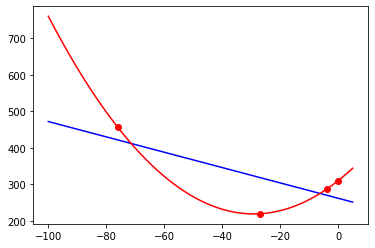

In [16]:
xs=arange(-100,5,1/100)
yslin=list(map(ft,xs))
ysquad=list(map(ft2,xs))
plot(xs,yslin,'b')
plot(xs,ysquad,'r')
plot(xi,yi,"ro")

In [18]:
# prediction for 2021
ft2(2021-2015)

351.5700188370516

In [38]:
#Q2
basis=[lambda x: cos(2*pi*0*x),
      lambda x: cos(2*pi*1*x),
      lambda x: sin(2*pi*1*x),
      lambda x: cos(2*pi*2*x),
      lambda x: sin(2*pi*2*x)]

In [39]:
def findfitWithBasis(m,xs,ys):
    A = zeros([m+1,m+1])
    b = zeros(m+1)
    for k in range(m+1):
        b[k] = sum(ys*basis[k](xs)) # change here
        for j in range(m+1):
            A[k,j] = sum(basis[k](xs)*basis[j](xs)) # and here
    a = linalg.solve(A,b)
    def fit(x):
        res = 0
        for i in range(m+1):
            res = res + a[i]*basis[i](x)
        return res
    return fit

In [40]:
datax = arange(1,13)/12
datay = array([9.2,8.7,8.2,9.6,11.4,13.6,15.4,16.9,17.3,16.3,14.7,12])
ft=findfitwithbasis(3,datax,datay)

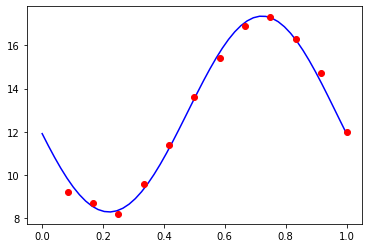

In [41]:
xs = linspace(0,1)
ys = list(map(ft,xs))
plot(xs,ys,'b')
plot(datax,datay,'or')